In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [100]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [101]:
df = pd.read_csv('/content/drive/MyDrive/DATA /CarsData.csv/CarsData.csv')

In [102]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         97712 non-null  int64  
 3   transmission  97712 non-null  object 
 4   mileage       97712 non-null  int64  
 5   fuelType      97712 non-null  object 
 6   tax           97712 non-null  int64  
 7   mpg           97712 non-null  float64
 8   engineSize    97712 non-null  float64
 9   Manufacturer  97712 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.5+ MB


In [104]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Fit and transform the data
df['model'] = label_encoder.fit_transform(df['model'])
df['fuelType'] = label_encoder.fit_transform(df['fuelType'])
df['Manufacturer'] = label_encoder.fit_transform(df['Manufacturer'])
df['transmission'] = label_encoder.fit_transform(df['transmission'])

df.head()


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,81,2017,7495,1,11630,4,145,60.1,1.0,3
1,115,2017,10989,1,9200,4,145,58.9,1.0,8
2,1,2019,27990,3,1614,0,145,49.6,2.0,1
3,184,2017,12495,1,30960,0,150,62.8,2.0,5
4,60,2017,7999,1,19353,4,125,54.3,1.2,2


In [105]:
df.corr()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
model,1.000000,0.034195,0.047294,-0.033125,-0.051132,0.016466,0.109521,-0.125399,-0.006182,0.310483
year,0.034195,1.000000,0.492491,0.143108,-0.739664,0.074482,0.192058,-0.130547,-0.035639,0.014781
price,0.047294,0.492491,1.000000,0.240976,-0.417996,-0.226397,0.307003,-0.295507,0.639356,-0.225038
transmission,-0.033125,0.143108,0.240976,1.000000,-0.125684,-0.061126,0.073363,-0.106992,0.149934,-0.071924
mileage,-0.051132,-0.739664,-0.417996,-0.125684,1.000000,-0.229391,-0.215558,0.183070,0.107299,-0.036642
fuelType,0.016466,0.074482,-0.226397,-0.061126,-0.229391,1.000000,0.101291,-0.230742,-0.510247,0.152758
tax,0.109521,0.192058,0.307003,0.073363,-0.215558,0.101291,1.000000,-0.451370,0.280770,-0.050463
mpg,-0.125399,-0.130547,-0.295507,-0.106992,0.183070,-0.230742,-0.451370,1.000000,-0.249346,-0.014868
engineSize,-0.006182,-0.035639,0.639356,0.149934,0.107299,-0.510247,0.280770,-0.249346,1.000000,-0.220415
Manufacturer,0.310483,0.014781,-0.225038,-0.071924,-0.036642,0.152758,-0.050463,-0.014868,-0.220415,1.000000


In [106]:
X = df.drop('price', axis = 1)
Y = df['price']
X.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,81,2017,1,11630,4,145,60.1,1.0,3
1,115,2017,1,9200,4,145,58.9,1.0,8
2,1,2019,3,1614,0,145,49.6,2.0,1
3,184,2017,1,30960,0,150,62.8,2.0,5
4,60,2017,1,19353,4,125,54.3,1.2,2


In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [119]:
from sklearn.linear_model import LassoCV

# Lasso with cross-validation to find the best alpha
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1, 10], cv=5)

# Fit model
lasso_cv.fit(X_train_scaled, y_train)

print(f'Optimal alpha: {lasso_cv.alpha_}')

# Now you can use lasso_cv.alpha_ in your Lasso model


Optimal alpha: 1.0


In [124]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Initialize the Lasso model
# alpha is the regularization strength; larger values mean more regularization
lasso = Lasso(alpha=1.0)

# Fit the model on the training data
lasso.fit(X_train_scaled, y_train)


Lasso(alpha=0.1)

In [126]:
# Use the trained model to make predictions on the test set
y_pred = lasso.predict(X_test_scaled)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 27410097.572485726


In [130]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

print(f"Mean Squared Error: {mse}\nRoot Mean Squared Error: {rmse}")


R-squared: 0.7184322448321544
Mean Squared Error: 27410097.572485726
Root Mean Squared Error: 5235.4653635074055


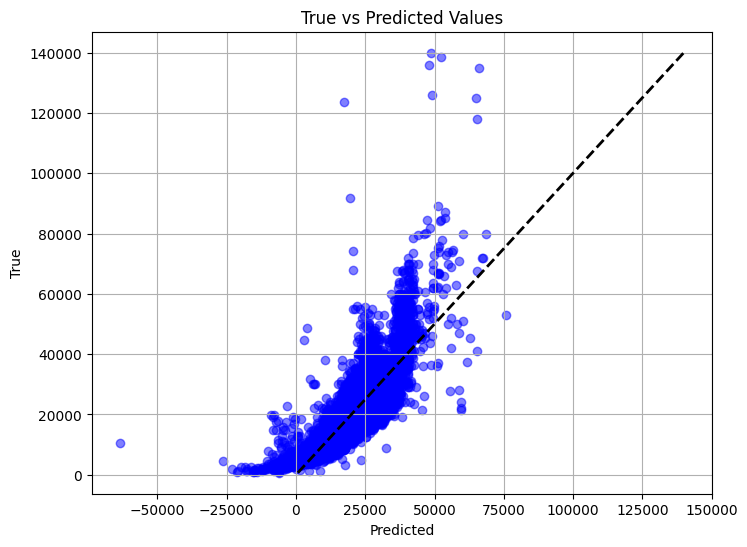

In [132]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_test, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('True vs Predicted Values')
plt.grid(True)
plt.show()
